# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [376]:
print("The busines objective is to identify the primary factors which influence the price of an used cars in order for the dealer to consider for understandign the pricing strategy and inventory decisions. As per the given data, dataset includes variables like region, year, manufacturer, model, condition, cylinders, fuel, odometer, title_status and drive which are most considerable for analysis & prediction purpose. By involving the statistical analysis & machine learning techniques, relevant predictors can be prepared. ")

The busines objective is to identify the primary factors which influence the price of an used cars in order for the dealer to consider for understandign the pricing strategy and inventory decisions. As per the given data, dataset includes variables like region, year, manufacturer, model, condition, cylinders, fuel, odometer, title_status and drive which are most considerable for analysis & prediction purpose. By involving the statistical analysis & machine learning techniques, relevant predictors can be prepared. 


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [378]:
print("Below are the high level steps to consider for data understanding -")
print("\n1. Data Exploration - Loading the data , preview the sample data, capture the number of rows and columns given for analysis")
print("\n2. Finding the meanign of each variable or feature to understand the relation between the used car price and other variables like region, year, manufacturer, model, condition, cylinders, fuel, odometer, title_status")
print("\n3. Data Preparation - To prepare or improve the quality of the data , cleansing the data for missing data , de-dup the data, appropriate data type conversionetc")
print("\n4. Analysing the distribution of the data and finding the relationships,patterns using the visual plots like histograms,box plots,bar plots etc")
print("\n5. Mapping the business requirements with preapred patterns or features like what factors are more infuential to decide the price of used car is acceptable or not for the dealer")
print("\n6. Finally document all the key findings and recommendations, action items for further analysis")

Below are the high level steps to consider for data understanding -

1. Data Exploration - Loading the data , preview the sample data, capture the number of rows and columns given for analysis

2. Finding the meanign of each variable or feature to understand the relation between the used car price and other variables like region, year, manufacturer, model, condition, cylinders, fuel, odometer, title_status

3. Data Preparation - To prepare or improve the quality of the data , cleansing the data for missing data , de-dup the data, appropriate data type conversionetc

4. Analysing the distribution of the data and finding the relationships,patterns using the visual plots like histograms,box plots,bar plots etc

5. Mapping the business requirements with preapred patterns or features like what factors are more infuential to decide the price of used car is acceptable or not for the dealer

6. Finally document all the key findings and recommendations, action items for further analysis


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [380]:
print("1. Identify missing data using isna().sum()")
print("\n2. Identify the data - rows or columns which is most missing and irrelevant for the analysis")
print("\n3. Remove the duplicate rows to avoid redundancy - drop_duplicates()")
print("\n4. Verify and convert all the required column's data type using astype() method")
print("\n5. Visualize and filter extreme values in key features (e.g., price, mileage, year) using boxplots, histograms")
print("\n6. Cap or remove outliers that could distort modeling")



1. Identify missing data using isna().sum()

2. Identify the data - rows or columns which is most missing and irrelevant for the analysis

3. Remove the duplicate rows to avoid redundancy - drop_duplicates()

4. Verify and convert all the required column's data type using astype() method

5. Visualize and filter extreme values in key features (e.g., price, mileage, year) using boxplots, histograms

6. Cap or remove outliers that could distort modeling


In [264]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

vehicle_df = pd.read_csv('data/vehicles.csv')
vehicle_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [30]:
num_rows, num_columns = vehicle_df.shape

# Get list of column names
column_names = list(vehicle_df.columns)

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
print(f"Column names: {column_names}")


Number of rows: 426880
Number of columns: 18
Column names: ['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state']


In [304]:
vehicle_df.isna().sum()

vehicle_df_filled.tail()

# vehicle_df['cylinders']=vehicle_df['cylinders'].str.replace('cylinders', '', regex=False).str.strip()
vehicle_df.drop_duplicates(inplace=True)
vehicle_df_filled = vehicle_df.fillna({'year': 0, 'manufacturer': 'UNKNOWN', 'model': 'UNKNOWN','condition': 'UNKNOWN','cylinders': 0,
                                       'fuel': 'UNKNOWN','odometer': 0,'title_status': 'UNKNOWN','transmission': 'UNKNOWN','VIN': 'UNKNOWN',
                                      'drive': 'NA', 'size': 'UNKNOWN', 'type': 'UNKNOWN', 'paint_color':'UNKNOWN'})
vehicle_df_filled['year'] = vehicle_df_filled['year'].astype(int)
vehicle_df_filled['odometer'] = vehicle_df_filled['odometer'].astype(int)
# vehicle_df_filled['cylinders'] = vehicle_df_filled['cylinders'].astype(int)



vehicle_df_filled.tail()

vehicle_df_filled.to_csv('data/vehicles_updated.csv', index=False)

In [356]:
#Removed the vehicles without VIN number, year=0, model=0, condition=0, price>
df0 = vehicle_df_filled.loc[~((['year'] == 0) & (vehicle_df_filled['model'] == 0) & (vehicle_df_filled['condition'] == 0))]
df1 = df0.loc[~((df0['VIN'] == 0))]
df2 = df1.loc[((df1['price'] >= 10000) & (df1['price'] <= 50000))]
df3 = df2.loc[~(df2['manufacturer'] == 0)]
df4 = df3.loc[~(df3['odometer'] <= 1000)]
df = df4.loc[~(df3['cylinders'] == 'other')]
# df['cylinders']=df['cylinders'].astype(int)
# df.loc[df['cylinders']] = df.loc[df['cylinders']].astype(int)

df.head()
num_rows, num_columns = df.shape
column_names = list(df.columns)

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
print(f"Column names: {column_names}")
df.to_csv('data/vehicles_updated_final.csv', index=False)

Number of rows: 233261
Number of columns: 18
Column names: ['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state']


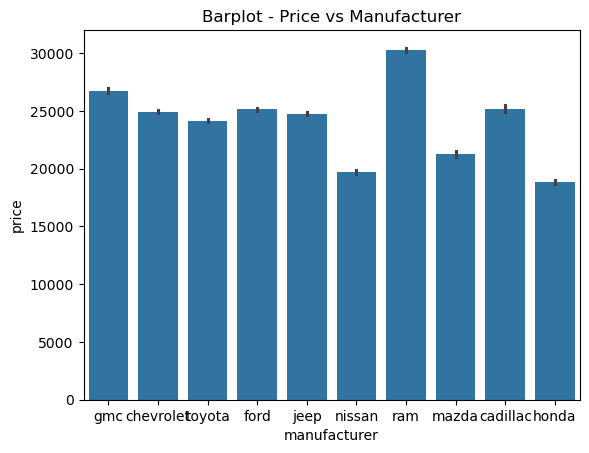

In [360]:
vehicle_df_1=df[df['manufacturer'].isin(df['manufacturer'].unique()[:10].tolist())]

# vehicle_df_1.hist("price")
plt.title("Barplot - Price vs Manufacturer")
sns.barplot(data=vehicle_df_1, x="manufacturer", y="price")
plt.savefig("images/UsedCars_Bar_Plot_img_01.png")

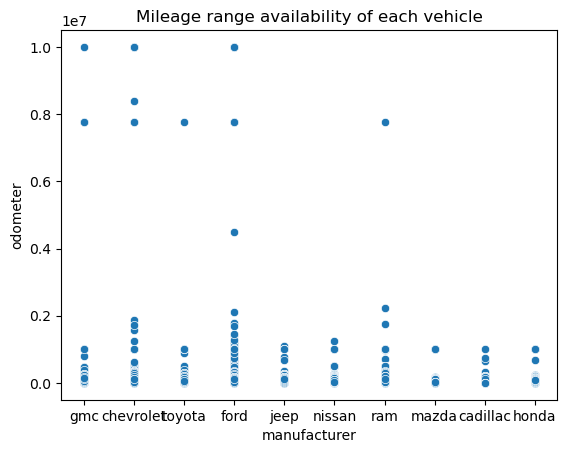

In [362]:
vehicle_df_1.head()
plt.title('Mileage range availability of each vehicle')
sns.scatterplot(data=vehicle_df_1, x="manufacturer", y="odometer")
plt.savefig("images/UsedCars_Scatter_Plot_img_02.png")

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [366]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

features = ['year', 'odometer', 'cylinders']
X = vehicle_df_1[features]
y = vehicle_df_1['price']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Evaluate each model
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    print(f"{name} CV MAE: {-cv_scores.mean():.2f}")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Test MAE: {mae:.2f}, R2: {r2:.2f}\n")


Linear Regression CV MAE: 8117.34
Linear Regression Test MAE: 8137.04, R2: 0.08

Ridge Regression CV MAE: 8117.34
Ridge Regression Test MAE: 8137.04, R2: 0.08

Lasso Regression CV MAE: 8117.34
Lasso Regression Test MAE: 8137.04, R2: 0.08

Random Forest CV MAE: 3150.18
Random Forest Test MAE: 2972.40, R2: 0.69



### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [390]:
print("As per the model out put , random forest show strong performance over the proce prediction achieving 69% compared to other regression models which gave same output of 0.08 mae and its udnerperformed. For used car data price prediction, straight relatio nbetween any 2 features doesnot work. Other multiple factors like location, season etc are also required. Linear `relationship between features and target doesnt workout well instead non-linear relationships will work well due to which random forest regression model outperformed .Further need to explore with other non-linear models for such complex & non-linear patterns.")

As per the model out put , random forest show strong performance over the proce prediction achieving 69% compared to other regression models which gave same output of 0.08 mae and its udnerperformed. For used car data price prediction, straight relatio nbetween any 2 features doesnot work. Other multiple factors like location, season etc are also required. Linear `relationship between features and target doesnt workout well instead non-linear relationships will work well due to which random forest regression model outperformed .Further need to explore with other non-linear models for such complex & non-linear patterns.


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [392]:
print("We have analyzed the data of 233261 consolidated rows with features year of manufacture , odometer(Mileage) and cylinders to predict the price of the vehicle.Less mileage, latest year of manufacture will have higher price along with the brand reputation of the vhicle, clean title, gas type are other additional features which will impact the price of the vehicle. For this non-linear data relation , random forest regression model is the best recommendation.Prioritize the vehicles with low mileage and know the brands in the inventory. If vehicles with more mileage , consider the other factors like history , title and location etc. Further analysis the factors like season, in-details refinement of the vehicle condition can be considered.")


We have analyzed the data of 233261 consolidated rows with features year of manufacture , odometer(Mileage) and cylinders to predict the price of the vehicle.Less mileage, latest year of manufacture will have higher price along with the brand reputation of the vhicle, clean title, gas type are other additional features which will impact the price of the vehicle. For this non-linear data relation , random forest regression model is the best recommendation.Prioritize the vehicles with low mileage and know the brands in the inventory. If vehicles with more mileage , consider the other factors like history , title and location etc. Further analysis the factors like season, in-details refinement of the vehicle condition can be considered.
